In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/DATA RUMAH.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_excel('/content/DATA RUMAH.xlsx')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


Data Preprocessing

In [ ]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB
Shape of data:
(1010, 8)


In [ ]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")
df.isna().sum()

Jumlah data duplicated: 0

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [ ]:
df = df.rename(columns={
    'NO': 'nomor',
    'NAMA RUMAH': 'nama_rumah',
    'HARGA': 'harga',
    'LB': 'lb',
    'LT': 'lt',
    'KT': 'kt',
    'KM': 'km',
    'GRS': 'grs'
})
df

,nomor,nama_rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [ ]:
#Mengganti satuan harga agar lebih readable
df['harga'] = (df['harga']/1000000).astype(int)
df.drop(columns=['nomor'], inplace=True)
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3


In [ ]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
    if harga <= q1:
        return 'Murah'
    elif harga <= median:
        return 'Menengah'
    else:
        return 'Mahal'

# Menambahkan kolom baru 'Klasifikasi Harga'
df['tingkat_harga'] = df['harga'].apply(classification_harga)

# Menampilkan DataFrame dengan kolom baru
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs,tingkat_harga
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0,Menengah
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2,Menengah
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4,Murah
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0,Murah
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3,Mahal


In [ ]:
df.describe()

,harga,lb,lt,kt,km,grs
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7628.982178,276.539604,237.432673,4.668317,3.607921,1.920792
std,7340.945285,177.864557,179.957604,1.572776,1.420066,1.510998
min,430.000000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3262.500000,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5000.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9000.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65000.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


Eksplorisasi Data

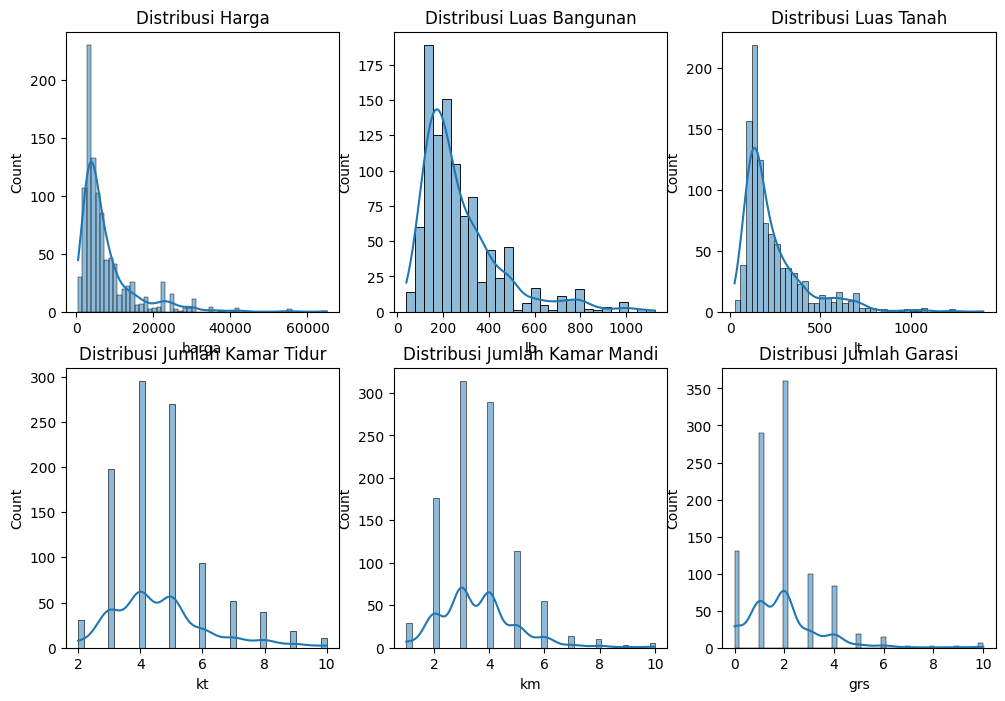

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['lb'], kde=True)
plt.title('Distribusi Luas Bangunan')

plt.subplot(2, 3, 3)
sns.histplot(df['lt'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kt'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['km'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['grs'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.show()

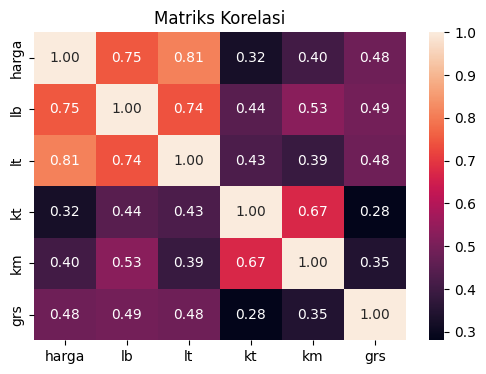

In [ ]:
# Menghapus kolom 'tingkat_harga' dan 'daerah'
df_corr = df.drop(['tingkat_harga','nama_rumah'], axis=1)

# Menghitung matriks korelasi
correlation_all = df_corr.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

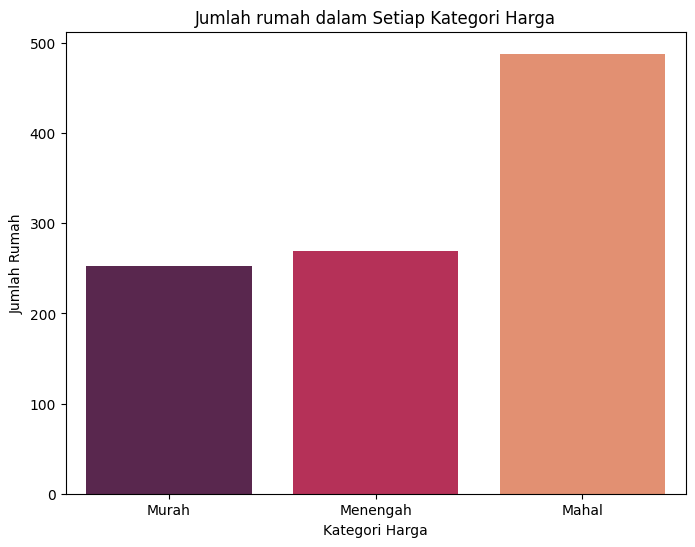

tingkat_harga
Mahal       488
Menengah    269
Murah       253
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')
plt.title('Jumlah rumah dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

Pemodelan dan Evaluasi

Persiapan Data untuk Pemodelan

In [ ]:
X = df[['lb']].values #Feature
y = df['harga'].values #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Regresi Linear

In [ ]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung MAE, MSE, dan R2 Score untuk data pelatihan
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Menghitung MAE, MSE, dan R2 Score untuk data pengujian
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model pada Data Pelatihan:")
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'R2 Score: {r2_train}')
print("\nEvaluasi Model pada Data Pengujian:")
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'R2 Score: {r2_test}')

Evaluasi Model pada Data Pelatihan:
MAE: 2829.602034688241
MSE: 25036631.75455711
R2 Score: 0.5497527937447579

Evaluasi Model pada Data Pengujian:
MAE: 2803.90028958318
MSE: 18805321.91235322
R2 Score: 0.5971678293941811


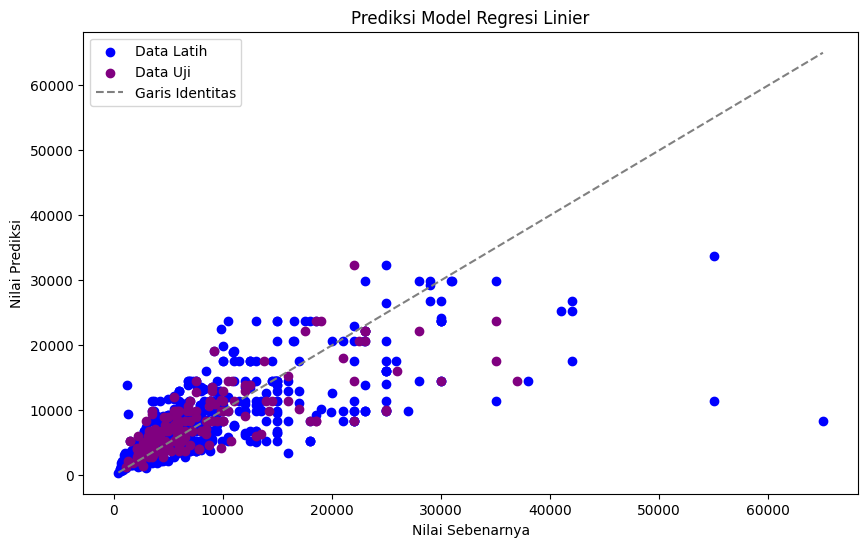

In [ ]:
# Visualisasi regresi untuk data latih dan data uji
plt.figure(figsize=(10, 6))

# Plot data latih
plt.scatter(y_train, y_train_pred, color='blue', label='Data Latih')

# Plot data uji
plt.scatter(y_test, y_pred, color='purple', label='Data Uji')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', label='Garis Identitas')

# Label sumbu x dan y
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')

# Judul plot
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk memprediksi harga berdasarkan luas bangunan
def predict_house_price(lb):
    # Lakukan prediksi harga menggunakan model regresi linier
    predicted_price = model.predict([[lb]])

    # Tampilkan hasil prediksi
    print("Harga rumah dengan luas bangunan {} meter persegi diperkirakan sekitar IDR {:,.3f} juta".format(lb, predicted_price[0]))

# Buat slider untuk luas bangunan
slider_lb = widgets.FloatSlider(value=100, min=df['lb'].min(), max=df['lb'].max(), step=10, description='LB:')

# Tampilkan interaktif untuk prediksi harga rumah
widgets.interactive(predict_house_price, lb=slider_lb)

interactive(children=(FloatSlider(value=100.0, description='LB:', max=1126.0, min=40.0, step=10.0), Output()),…